<a href="https://colab.research.google.com/github/subhan215/pandas-Assignment/blob/main/Pandas_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob


In [ ]:
from google.colab import drive
drive.mount('./content')


Mounted at ./content


In [ ]:
import os
os.chdir('./content/MyDrive/Assignment')

In [ ]:
files = glob.glob('states*.csv')
data_list = [pd.read_csv(file) for file in files] 
us_census = pd.concat(data_list)

In [ ]:
print(us_census.columns)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


In [ ]:
us_census['Income'] = us_census.Income.str[1:]
us_census['Income'] = pd.to_numeric(us_census.Income)


In [ ]:
gender_split = us_census.GenderPop.str.split('_')
us_census['Men'] = gender_split.str.get(0)
us_census['Women'] = gender_split.str.get(1)

In [ ]:
# Replacing M and F characters

us_census['Men'] = us_census.Men.str[:-1]
us_census['Women'] = us_census.Women.str[:-1]

In [ ]:
# converting men and women into numeric types

us_census['Men'] = pd.to_numeric(us_census.Men)
us_census['Women'] = pd.to_numeric(us_census.Women)

In [ ]:
us_census = us_census.fillna(value={'Women': us_census.TotalPop - us_census.Men})

In [ ]:
duplicates = us_census.duplicated(subset=['State'])
print(duplicates.value_counts())


False    51
True      9
dtype: int64


In [ ]:
us_census = us_census.drop_duplicates()

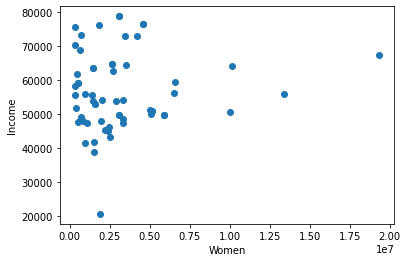

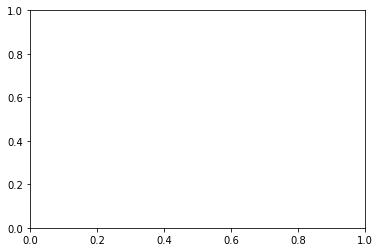

In [ ]:
plt.scatter(us_census['Women'],
            us_census['Income'])
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()
plt.cla()

In [ ]:
us_census['Hispanic'] = us_census.Hispanic.str[:-1]
us_census['Hispanic'] = pd.to_numeric(us_census.Hispanic)

us_census['White'] = us_census.White.str[:-1]
us_census['White'] = pd.to_numeric(us_census.White)

us_census['Black'] = us_census.Black.str[:-1]
us_census['Black'] = pd.to_numeric(us_census.Black)

us_census['Native'] = us_census.Native.str[:-1]
us_census['Native'] = pd.to_numeric(us_census.Native)

us_census['Asian'] = us_census.Asian.str[:-1]
us_census['Asian'] = pd.to_numeric(us_census.Asian)

us_census['Pacific'] = us_census.Pacific.str[:-1]
us_census['Pacific'] = pd.to_numeric(us_census.Pacific)

In [ ]:
us_census = us_census.fillna(value={'Hispanic': us_census.Hispanic.mean(),
                                    'White': us_census.White.mean(),
                                    'Black': us_census.Black.mean(),
                                    'Native': us_census.Native.mean(),
                                    'Asian': us_census.Asian.mean(),
                                    'Pacific': us_census.Pacific.mean()})

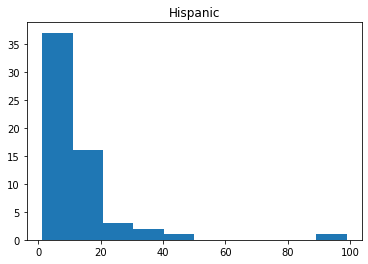

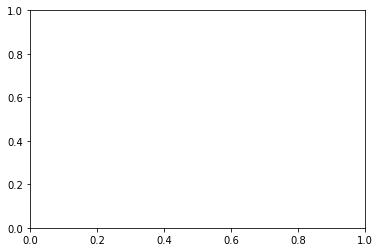

In [ ]:
plt.hist(us_census['Hispanic'])
plt.title('Hispanic')
plt.show()
plt.cla()


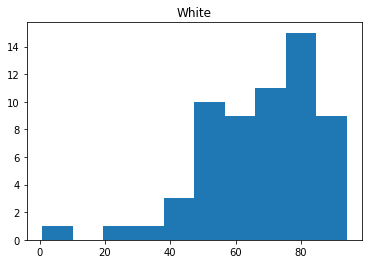

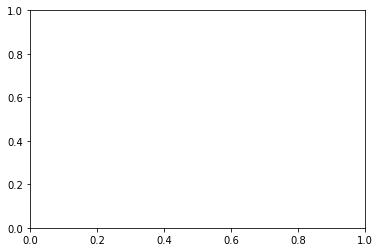

In [ ]:
plt.hist(us_census['White'])
plt.title('White')
plt.show()
plt.cla()

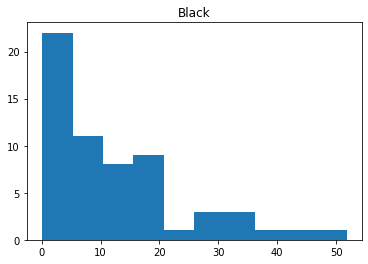

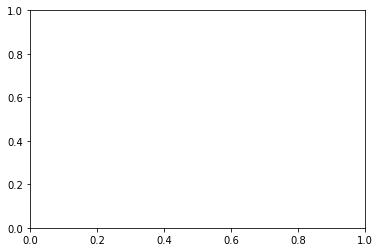

In [ ]:
plt.hist(us_census['Black'])
plt.title('Black')
plt.show()
plt.cla()

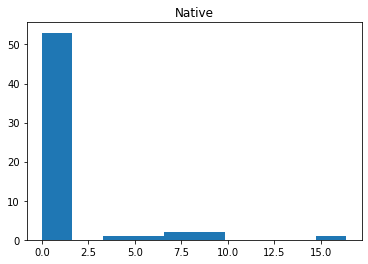

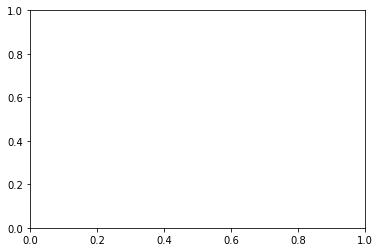

In [ ]:
plt.hist(us_census['Native'])
plt.title('Native')
plt.show()
plt.cla()

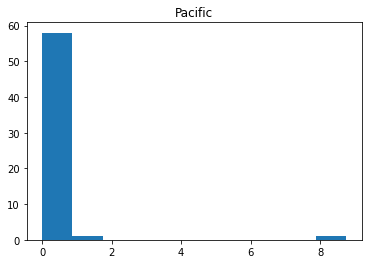

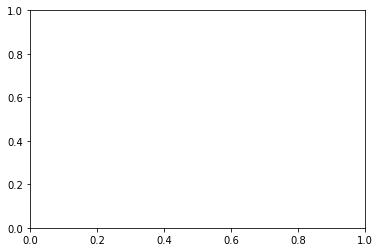

In [ ]:
plt.hist(us_census['Pacific'])
plt.title('Pacific')
plt.show()
plt.cla()

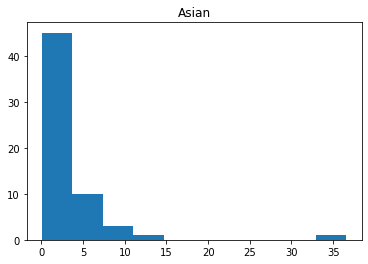

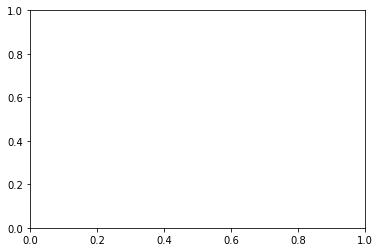

In [ ]:
plt.hist(us_census['Asian'])
plt.title('Asian')
plt.show()
plt.cla()

In [ ]:
print(us_census.head())
print(us_census.dtypes)

   Unnamed: 0           State  ...      Men       Women
0           0      New Jersey  ...  4343027   4561386.0
1           1      New Mexico  ...  1032414   1051703.0
2           2        New York  ...  9541801  10131373.0
3           3  North Carolina  ...  4795408   5049925.0
4           4    North Dakota  ...   367963    353677.0

[5 rows x 13 columns]
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object


In [ ]:
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,New Jersey,8904413,18.749500,56.488761,14.387862,0.115335,8.159990,0.031319,76581.083417,4343027M_4561386F,4343027,4561386.0
1,1,New Mexico,2084117,45.282932,40.697992,1.755020,9.248594,1.234337,0.042771,47329.967871,1032414M_1051703F,1032414,1051703.0
2,2,New York,19673174,17.241425,56.470105,15.668046,0.321639,7.897159,0.023451,64290.749113,9541801M_10131373F,9541801,10131373.0
3,3,North Carolina,9845333,8.464763,64.597651,21.395117,1.085491,2.317457,0.052326,49937.464137,4795408M_5049925F,4795408,5049925.0
4,4,North Dakota,721640,2.832683,87.448293,1.284390,5.651220,0.961951,0.282927,58188.112195,367963M_353677F,367963,353677.0
5,5,Ohio,11575977,3.672084,75.903060,16.207276,0.168888,1.621081,0.022645,49655.248466,5662893M_5913084F,5662893,5913084.0
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295.0
